In [266]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [484]:
df = pd.read_csv('MLSFBRef1 - Sheet2.csv')


In [485]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s▼,Goals,Shots on Target,...,Assists,xA,Passes into Final 3rd,Passes into Pen Area,Defensive Duels,TklW,Defensive Duel%,Dribbles,Dribble Success%,Recoveries
0,5,Raúl Ruidíaz\Raul-Ruidiaz,pe PER,FW,Seattle,31-002,1990,15.4,0.71,1.43,...,0.00,0.06,0.78,0.45,0.19,0.13,68.421053,2.01,51.6,3.83
1,28,Cristián Dajome\Cristian-Dajome,co COL,FWMF,Vancouver,27-205,1994,14.3,0.42,0.56,...,0.14,0.09,1.96,0.84,1.75,0.98,56.000000,1.82,69.2,5.10
2,50,Kacper Przybyłko\Kacper-Przybylko,pl POL,FW,Philadelphia,28-124,1993,13.9,0.43,1.01,...,0.14,0.11,1.08,0.94,0.50,0.22,44.000000,1.37,68.4,4.39
3,51,Albert Rusnák\Albert-Rusnak,sk SVK,FWMF,Real Salt Lake,27-020,1994,13.8,0.22,0.36,...,0.22,0.16,2.68,0.51,0.72,0.36,50.000000,1.09,53.3,4.13
4,52,Dániel Sallói\Daniel-Salloi,hu HUN,FW,Sporting KC,25-008,1996,13.8,0.65,1.30,...,0.22,0.17,0.80,1.09,0.72,0.58,80.555556,2.25,35.5,5.07


In [486]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [487]:
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s▼,Goals,Shots on Target,...,Assists,xA,Passes into Final 3rd,Passes into Pen Area,Defensive Duels,TklW,Defensive Duel%,Dribbles,Dribble Success%,Recoveries
0,5,Raúl Ruidíaz,pe PER,FW,Seattle,31-002,1990,15.4,0.71,1.43,...,0.00,0.06,0.78,0.45,0.19,0.13,68.421053,2.01,51.6,3.83
1,28,Cristián Dajome,co COL,FWMF,Vancouver,27-205,1994,14.3,0.42,0.56,...,0.14,0.09,1.96,0.84,1.75,0.98,56.000000,1.82,69.2,5.10
2,50,Kacper Przybyłko,pl POL,FW,Philadelphia,28-124,1993,13.9,0.43,1.01,...,0.14,0.11,1.08,0.94,0.50,0.22,44.000000,1.37,68.4,4.39
3,51,Albert Rusnák,sk SVK,FWMF,Real Salt Lake,27-020,1994,13.8,0.22,0.36,...,0.22,0.16,2.68,0.51,0.72,0.36,50.000000,1.09,53.3,4.13
4,52,Dániel Sallói,hu HUN,FW,Sporting KC,25-008,1996,13.8,0.65,1.30,...,0.22,0.17,0.80,1.09,0.72,0.58,80.555556,2.25,35.5,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,379,Alexandru Mățan,ro ROU,FW,Columbus Crew,21-332,1999,5.3,0.00,0.19,...,0.00,0.02,1.51,0.57,1.89,0.75,39.682540,4.34,73.9,8.11
86,384,Brian White,us USA,FW,Vancouver,25-174,1996,5.1,0.20,0.78,...,0.20,0.14,0.59,0.20,0.59,0.39,66.101695,1.18,33.3,3.73
87,386,Jhonder Cádiz,ve VEN,FW,Nashville,25-363,1995,5.0,0.40,1.00,...,0.20,0.16,1.20,0.20,1.00,0.20,20.000000,1.20,50.0,3.00
88,390,Chinonso Nnamdi Offor,ng NGA,FW,Chicago Fire,21-061,2000,5.0,0.20,1.40,...,0.00,0.04,1.00,1.00,1.60,1.20,75.000000,3.40,64.7,7.00


In [488]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born','90s▼','TklW'],axis=1).reset_index()

In [489]:
df

,index,Player,Goals,Shots on Target,Shots on Target%,xG,Assists,xA,Passes into Final 3rd,Passes into Pen Area,Defensive Duels,Defensive Duel%,Dribbles,Dribble Success%,Recoveries
0,0,Raúl Ruidíaz,0.71,1.43,40.0,0.66,0.00,0.06,0.78,0.45,0.19,68.421053,2.01,51.6,3.83
1,1,Cristián Dajome,0.42,0.56,34.8,0.35,0.14,0.09,1.96,0.84,1.75,56.000000,1.82,69.2,5.10
2,2,Kacper Przybyłko,0.43,1.01,46.7,0.35,0.14,0.11,1.08,0.94,0.50,44.000000,1.37,68.4,4.39
3,3,Albert Rusnák,0.22,0.36,26.3,0.25,0.22,0.16,2.68,0.51,0.72,50.000000,1.09,53.3,4.13
4,4,Dániel Sallói,0.65,1.30,40.0,0.53,0.22,0.17,0.80,1.09,0.72,80.555556,2.25,35.5,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,Alexandru Mățan,0.00,0.19,11.1,0.13,0.00,0.02,1.51,0.57,1.89,39.682540,4.34,73.9,8.11
86,86,Brian White,0.20,0.78,80.0,0.22,0.20,0.14,0.59,0.20,0.59,66.101695,1.18,33.3,3.73
87,87,Jhonder Cádiz,0.40,1.00,26.3,0.60,0.20,0.16,1.20,0.20,1.00,20.000000,1.20,50.0,3.00
88,88,Chinonso Nnamdi Offor,0.20,1.40,46.7,0.40,0.00,0.04,1.00,1.00,1.60,75.000000,3.40,64.7,7.00


In [490]:
params = list(df.columns)
print(params)
params = params[2:]

['index', 'Player', 'Goals', 'Shots on Target', 'Shots on Target%', 'xG', 'Assists', 'xA', 'Passes into Final 3rd', 'Passes into Pen Area', 'Defensive Duels', 'Defensive Duel%', 'Dribbles', 'Dribble Success%', 'Recoveries']


In [491]:
player = df.loc[df['Player']=='Mason Toye'].reset_index()
player = list(player.loc[0])
player = player[3:]

In [492]:
player

[0.91,
 1.36,
 60.0,
 0.65,
 0.0,
 0.08,
 1.06,
 0.61,
 1.06,
 57.5471698,
 1.06,
 57.1,
 1.82]

In [493]:
df.Player.values

array(['Raúl Ruidíaz', 'Cristián Dajome', 'Kacper Przybyłko',
       'Albert Rusnák', 'Dániel Sallói', 'Cristian Espinoza',
       'Maximiliano Urruti', 'Valentín Castellanos', 'Brenner',
       'Diego Rossi', 'Robert Berić', 'Cecilio Domínguez', 'Fafà Picault',
       'Lewis Morgan', 'Gustavo Bou', 'Rubio Rubin', 'Hany Mukhtar',
       'Michael Barrios', 'Khiry Shelton', 'Fábio', 'Samuel Grandsir',
       'Álvaro Barreal', 'Przemysław Frankowski', 'Diego Rubio',
       'Jáder Obrian', 'Nani', 'Adam Buksa', 'Lucas Cavallini',
       'Cade Cowell', 'C.J. Sapong', 'Gonzalo Higuaín',
       'Javier Hernández', 'Jeremy Ebobisse', 'Kevin Cabral',
       'Arnór Ingvi Traustason', 'Tesho Akindele', 'Carlos Vela',
       'Gyasi Zardes', 'Chris Mueller', 'Alan Pulido', 'Johnny Russell',
       'Franco Jara', 'Robin Lod', 'Ricardo Pepi', 'Yimmi Chará',
       'Sergio Santos Gomes', 'Jared Stroud', 'Corey Baird',
       'Marvin Loría', 'Benji Michel', 'Tajon Buchanan',
       'Ismael Tajouri-Shra

In [494]:
print(len(player),print(len(params)))
#player = player[4:]
#print(len(player),print(len(params)))

13
13 None


In [495]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [496]:
values

[96, 85, 93, 91, 12, 21, 38, 31, 50, 44, 8, 57, 1]

In [497]:
(stats.percentileofscore(df[params[0]],player[0]))

96.66666666666667

In [498]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [499]:
baker = PyPizza(
    params=params,
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1, 
    other_circle_ls="-."
    )

Text(0.515, 0.942, 'Mason Toye Percentile Rank vs. MLS Strikers')

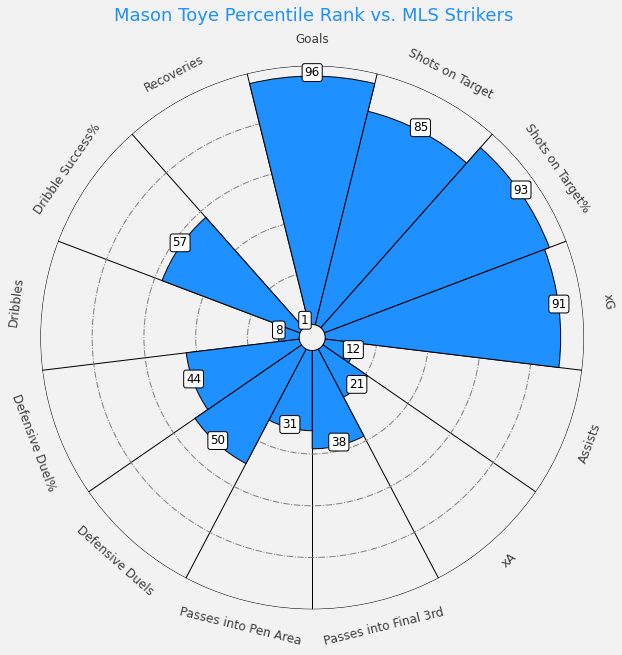

In [500]:
fig, ax = baker.make_pizza(
    values, 
    figsize=(10, 10),
    param_location=110,
    kwargs_slices=dict(
        facecolor="dodgerblue", edgecolor="Black",
        zorder=2, linewidth=1
    ),
    
    kwargs_params=dict(
        color="black", fontsize=12,
        va="center", alpha=0.75
    ),
    
     kwargs_values=dict(
        color="black", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="Black", facecolor="white",
            boxstyle="round,pad=0.2", lw=1
        )
    ) 

)

fig.text(
    0.515, 0.942, "Mason Toye Percentile Rank vs. MLS Strikers", size=18, ha="center", color="dodgerblue")